## Load Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# ============================
# üîπ 1Ô∏è‚É£  üîπ
# ============================

# Step 1: Load Dataset
df = pd.read_csv('Toto Winning Numbers.csv')

## Preprocess Data

In [5]:
# Step 2: 
df.columns = df.columns.str.strip()  # Clean column names
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Extract Winning Number columns
winning_cols = [col for col in df.columns if 'Winning Number' in col]

## Feature Engineering

In [6]:
# Step 3: Feature Engineering
df['EvenCount'] = df[winning_cols].apply(lambda x: sum(num % 2 == 0 for num in x), axis=1)
df['OddCount'] = df[winning_cols].apply(lambda x: sum(num % 2 != 0 for num in x), axis=1)
df['HighCount'] = df[winning_cols].apply(lambda x: sum(num > 25 for num in x), axis=1)
df['LowCount'] = df[winning_cols].apply(lambda x: sum(num <= 25 for num in x), axis=1)

def add_features(df):
    """Extract statistical features from the lottery results for model training."""
    
    winning_cols = [col for col in df.columns if 'Winning Number' in col]
    all_numbers = np.arange(1, 50)

    # Initialize feature dictionary
    feature_dict = {
        num: {'Hot': 0, 'Cold': 1, 'Even': 0, 'Odd': 0, 'High': 0, 'Low': 0, 'Repeat': 0}
        for num in all_numbers
    }

    past_draws = []  # Store previous draw results for repeat number tracking

    for _, row in df.iterrows():
        drawn_numbers = row[winning_cols].values  
        
        for num in all_numbers:
            feature_dict[num]['Hot'] += 1 if num in drawn_numbers else 0  
            feature_dict[num]['Cold'] = 0 if num in drawn_numbers else feature_dict[num]['Cold']  
            feature_dict[num]['Even'] = 1 if num % 2 == 0 else 0  
            feature_dict[num]['Odd'] = 1 if num % 2 != 0 else 0
            feature_dict[num]['High'] = 1 if num > 25 else 0  
            feature_dict[num]['Low'] = 1 if num <= 25 else 0
            feature_dict[num]['Repeat'] = 1 if num in past_draws else 0  

        past_draws = drawn_numbers  

    # Convert dictionary to DataFrame
    features = pd.DataFrame.from_dict(feature_dict, orient='index').reset_index()
    features.rename(columns={'index': 'Number'}, inplace=True)
    
    return df, features

# Apply feature engineering
df, features = add_features(df)

## Define Target Variable (Winning Group)

In [7]:
# Step 4: Target Variable 
df['WinningGroup'] = (df['Division 1 Winners'] > 0).astype(int)

## Select Features & Split Data

In [8]:
# Step 5: Select Features & Split Data
X = df[['Month', 'DayOfWeek', 'EvenCount', 'OddCount', 'HighCount', 'LowCount'] + winning_cols]
y = df['WinningGroup']

print("X variables:\n", X.head())
print("\ny variable:\n", y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X variables:
    Month  DayOfWeek  EvenCount  OddCount  HighCount  LowCount  \
0      5          3          3         3          1         5   
1      5          0          4         2          4         2   
2      5          3          4         2          4         2   
3      5          0          2         4          2         4   
4      5          3          0         6          4         2   

   Winning Number 1  Winning Number 2  Winning Number 3  Winning Number 4  \
0                 5                 8                13                20   
1                21                22                40                41   
2                15                20                36                38   
3                 5                12                15                21   
4                 7                13                35                39   

   Winning Number 5  Winning Number 6  
0                21                46  
1                42                46  
2           

## Machine Learning Model

In [9]:
# ===================================
# üîπ 5Ô∏è‚É£ MACHINE LEARNING MODELS üîπ
# ===================================

models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=15, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7)
}

for name, model in models.items():
    model.fit(X_train, y_train)  
    predictions = model.predict(X_test)  

    print(f"\nüìä {name} Performance for Winning Group Prediction:")
    print(classification_report(y_test, predictions))  
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy*100:.2f}%")


üìä Random Forest Performance for Winning Group Prediction:
              precision    recall  f1-score   support

           0       0.61      0.86      0.71       172
           1       0.44      0.17      0.24       114

    accuracy                           0.58       286
   macro avg       0.53      0.51      0.48       286
weighted avg       0.54      0.58      0.53       286

Accuracy: 58.39%

üìä Decision Tree Performance for Winning Group Prediction:
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       172
           1       0.42      0.39      0.40       114

    accuracy                           0.54       286
   macro avg       0.52      0.52      0.52       286
weighted avg       0.54      0.54      0.54       286

Accuracy: 54.20%

üìä KNN Performance for Winning Group Prediction:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       172
           1       0.49    

## Feature Importance

/var/folders/26/1sqcgyf96cb0q8fj7pqq1c5m0000gn/T/ipykernel_42528/877383293.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette="viridis")


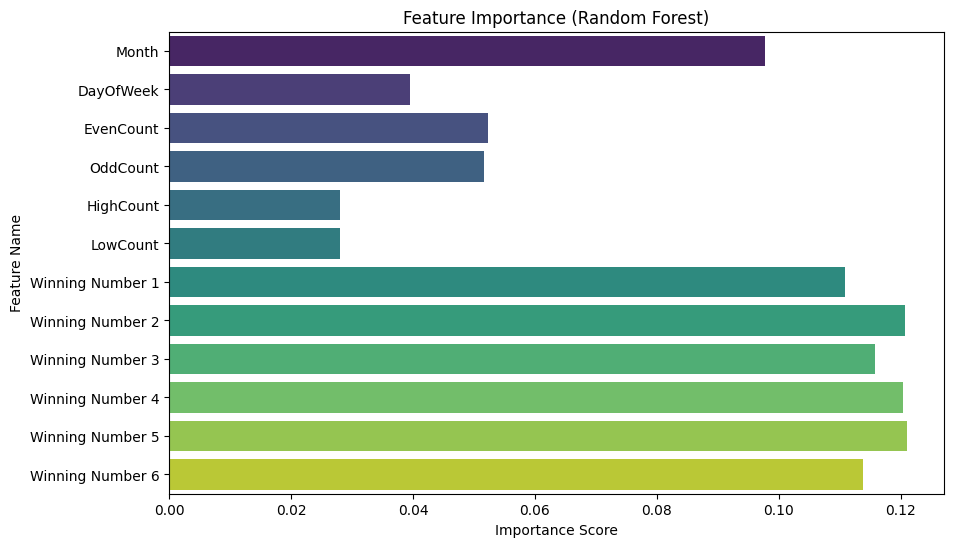

üìå **Feature Importance Interpretation:**
üîπ If 'Month' is most important, then some months may be more likely to have winners.
üîπ If 'DayOfWeek' is dominant, jackpot draws may favor certain days.



In [10]:
# ====================================================
# FEATURE IMPORTANCE (TREE-BASED MODELS)
# ====================================================

rf_model = models['Random Forest']
feature_importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance (Random Forest)")
plt.show()

print("üìå **Feature Importance Interpretation:**\n"
      "üîπ If 'Month' is most important, then some months may be more likely to have winners.\n"
      "üîπ If 'DayOfWeek' is dominant, jackpot draws may favor certain days.\n")

# WINNING NUMBER ANALYSIS

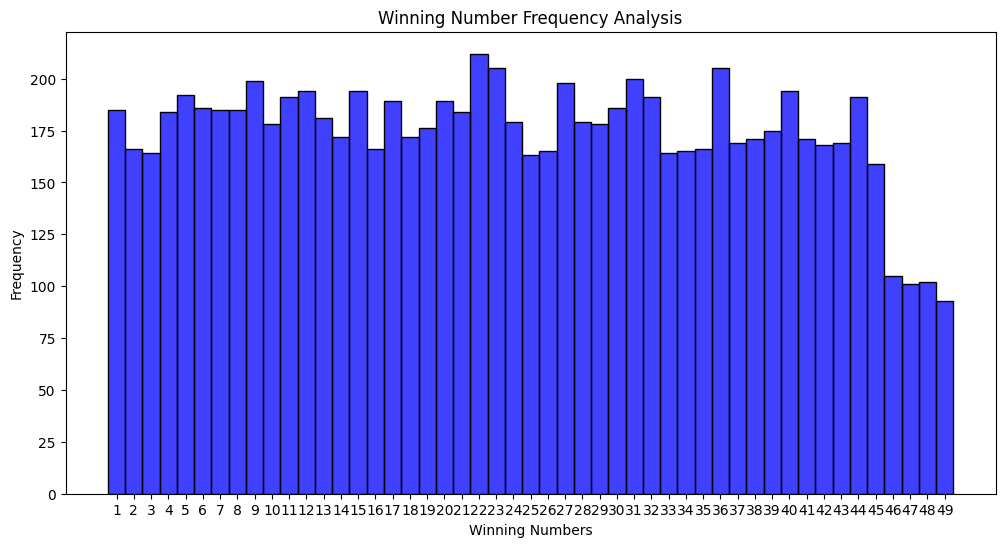

üìå **Winning Number Frequency Analysis:**
üîπ Taller bars indicate numbers that appear more frequently.
üîπ If all numbers have similar frequency, then draws are well-randomized.



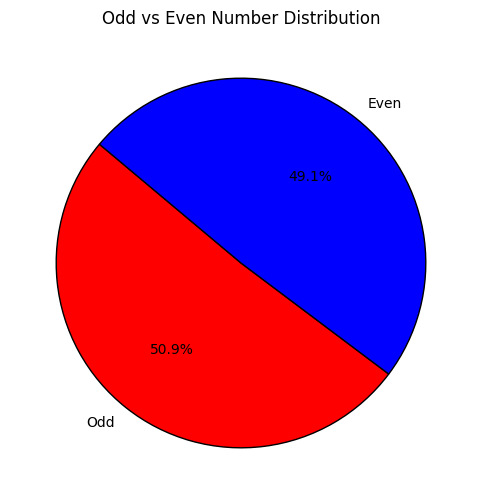

üìå **Odd vs Even Distribution:**
üîπ Odd numbers appeared 4351 times.
üîπ Even numbers appeared 4205 times.
üîπ If odd/even numbers are balanced (~50%), then the draw is likely unbiased.
üîπ If one dominates (>60%), it may indicate a trend.



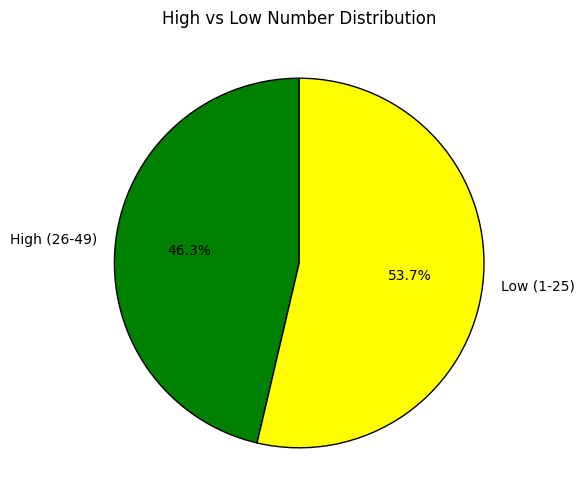

üìå **High vs Low Number Analysis:**
üîπ High numbers (26-49) appeared 3965 times.
üîπ Low numbers (1-25) appeared 4591 times.
üîπ If high and low numbers are balanced (~50%), then the draw is likely random.
üîπ If one category dominates (>60%), it suggests a potential trend in high/low number selection.



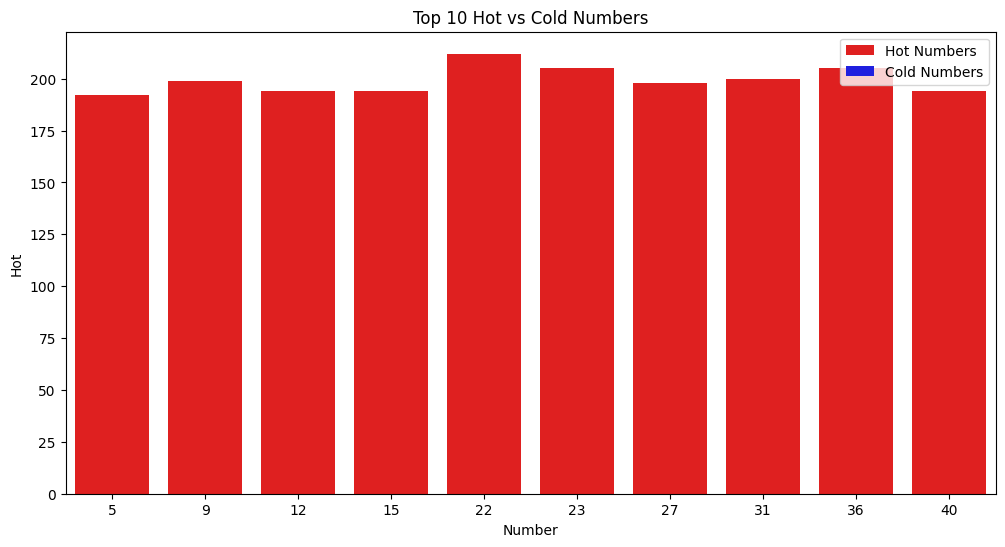


üî• **Hot Picks (Most Frequent Numbers):** [22, 23, 36]
‚ùÑÔ∏è **Cold Picks (Least Drawn Numbers):** [1, 26, 28]
üéØ **Balanced Selection:** [1, 36, 22, 23, 26, 28]
üìå **Number Recommendation Interpretation:**
üîπ Hot numbers are historically frequent, but past results don't guarantee future wins.
üîπ Cold numbers are rarely drawn, but may be overdue for selection.



In [11]:


# ============================
# üîπ 7Ô∏è‚É£ WINNING NUMBER ANALYSIS üîπ
# ============================

plt.figure(figsize=(12, 6))
winning_numbers = df[[col for col in df.columns if 'Winning Number' in col]].values.flatten()
sns.histplot(winning_numbers, bins=np.arange(1, 51) - 0.5, kde=False, color="blue")
plt.xticks(np.arange(1, 50))
plt.xlabel("Winning Numbers")
plt.ylabel("Frequency")
plt.title("Winning Number Frequency Analysis")
plt.show()

print("üìå **Winning Number Frequency Analysis:**\n"
      "üîπ Taller bars indicate numbers that appear more frequently.\n"
      "üîπ If all numbers have similar frequency, then draws are well-randomized.\n")

# ============================
# üîπ 8Ô∏è‚É£ ODD/EVEN & HIGH/LOW ANALYSIS üîπ
# ============================

# ‚úÖ Ensure winning numbers are properly extracted
winning_numbers = df[[col for col in df.columns if 'Winning Number' in col]].values.flatten()
winning_numbers = winning_numbers[~np.isnan(winning_numbers)]

# üìä Odd vs Even Distribution
odd_even_counts = [np.sum(winning_numbers % 2 == 1), np.sum(winning_numbers % 2 == 0)]

plt.figure(figsize=(6, 6))
plt.pie(odd_even_counts, labels=['Odd', 'Even'], autopct='%1.1f%%', 
        colors=['red', 'blue'], startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Odd vs Even Number Distribution")
plt.show()

print("üìå **Odd vs Even Distribution:**\n"
      f"üîπ Odd numbers appeared {odd_even_counts[0]} times.\n"
      f"üîπ Even numbers appeared {odd_even_counts[1]} times.\n"
      "üîπ If odd/even numbers are balanced (~50%), then the draw is likely unbiased.\n"
      "üîπ If one dominates (>60%), it may indicate a trend.\n")

# üìä High vs Low Number Distribution (Using actual counts)
high_low_counts = [np.sum(winning_numbers > 25), np.sum(winning_numbers <= 25)]

plt.figure(figsize=(6, 6))
plt.pie(high_low_counts, labels=['High (26-49)', 'Low (1-25)'], autopct='%1.1f%%', 
        colors=['green', 'yellow'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("High vs Low Number Distribution")
plt.show()

print("üìå **High vs Low Number Analysis:**\n"
      f"üîπ High numbers (26-49) appeared {high_low_counts[0]} times.\n"
      f"üîπ Low numbers (1-25) appeared {high_low_counts[1]} times.\n"
      "üîπ If high and low numbers are balanced (~50%), then the draw is likely random.\n"
      "üîπ If one category dominates (>60%), it suggests a potential trend in high/low number selection.\n")

# ============================
# üîπ 9Ô∏è‚É£ NUMBER RECOMMENDATION üîπ
# ============================

def suggest_numbers(features, n=6):
    hot_numbers = features.sort_values(by='Hot', ascending=False).head(n//2)['Number'].tolist()
    cold_numbers = features.sort_values(by='Cold', ascending=False).head(n//2)['Number'].tolist()
    recommended_numbers = list(set(hot_numbers + cold_numbers))[:n]  

    return {"Hot": hot_numbers, "Cold": cold_numbers, "Balanced Selection": recommended_numbers}

number_suggestions = suggest_numbers(features)

hot_cold_df = features.sort_values(by='Hot', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Number', y='Hot', data=hot_cold_df, color='red', label='Hot Numbers')
sns.barplot(x='Number', y='Cold', data=hot_cold_df, color='blue', label='Cold Numbers')
plt.title("Top 10 Hot vs Cold Numbers")
plt.legend()
plt.show()

print(f"\nüî• **Hot Picks (Most Frequent Numbers):** {number_suggestions['Hot']}")
print(f"‚ùÑÔ∏è **Cold Picks (Least Drawn Numbers):** {number_suggestions['Cold']}")
print(f"üéØ **Balanced Selection:** {number_suggestions['Balanced Selection']}")

print("üìå **Number Recommendation Interpretation:**\n"
      "üîπ Hot numbers are historically frequent, but past results don't guarantee future wins.\n"
      "üîπ Cold numbers are rarely drawn, but may be overdue for selection.\n")
